#  Chapter 4 Notebook - Data cleaning

If you are new to Jupyter notebooks, the following tutorial gives a beginners introduction to how to navigate and use them: https://www.dataquest.io/blog/jupyter-notebook-tutorial/

Please ensure you are using the latest version of python3 and have all the import libraries installed using anaconda before you try to run any code cells;
https://www.python.org/downloads/

Firstly, in the menu above, click Kernel > Restart and run all to have all code cells executed.

https://docs.anaconda.com/anaconda/install/index.html

# Import libraries

In [1]:
# imports all libraries in one place to use throughout code cells
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#python regex library for checking strings
import re

# the following are visualisation libraries
# this first line causes plots to be output directly below the code cells that produced them.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# libraries for scaling and normalising an exponential distribution
# mlxtend must be installed as a seperate library from http://rasbt.github.io/mlxtend/installation/
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [2]:
# variables to define plot sizes for this notebook
# Modify as required for smaller screens to change size of plots
plot_size_square = (8,8)
plot_size_medium = (12,8)
plot_size_rectangle = (16,8)

# Import Dataset

In [3]:
# import the dataset from a source file in the same directory
# dataset link : https://www.opendatani.gov.uk/dataset/00ae9bce-37d3-41f2-abfb-ecc8a1ff1fe4/resource/32176bf0-08e8-41ed-af4e-1d69db72766b/download/construction-contracts-2018.19-year.csv
# pandas has a lot of 'read_' functions - the full list is here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
df = pd.read_csv('construction-contracts-2018.19-year.csv')

# see the rows and columns output to ensure the import was successful
df.shape

(168, 11)

We would like to see the state of the data before visualising and cleaning

In [4]:
# print out the top 5 rows to see how the data looks
df.head()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by,Basis for DAC Award,Latitude,Longitude
0,SE1239829-M Replacement of Air Handling Unit a...,"�112,668",05/04/2018,William Coates Ltd,"37 Mallusk Road, Newtownabbey, Co.Antrim",BELFAST,BT36 4PP,South Eastern Health & Social Care Trust,NaN,54.67474,-5.98721
1,SE1240005-M Refurbishment of plant room at Riv...,"�259,165",05/04/2018,Irwin M&E Ltd,Unit 4 Diviny Drive,CRAIGAVON,BT63 5WE,South Eastern Health & Social Mare Trust,NaN,54.44822,-6.41513
2,Maydown PSNI Station Conversion to Gas - Vario...,"�526,045.10",17/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board,NaN,NaN,NaN
3,PSNI Estate � Electronic Access Control Systems,"�3,804,463.88",24/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board,NaN,NaN,NaN
4,Peace Walls Maintenance Contract,"�127,875.00",04/05/2018,WIthheld,WIthheld,WIthheld,WIthheld,Department of Justice,NaN,NaN,NaN


The column header names are all clear, we dont need to rename any of those for future analysts.

In [5]:
# print the bottom 5 rows of the dataframe to see if there are issues at the bottom
df.tail()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by,Basis for DAC Award,Latitude,Longitude
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,* The exact value is not known at the point of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One stray cell at the bottom of the imported CSV file has data, creating a lot of empty rows, we need to trim unnecessary rows from the bottom of the dataframe.

In [6]:
# firstly, see how many company names are "nan"
df[df['Company name'].isnull()]

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by,Basis for DAC Award,Latitude,Longitude
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop (ie. delete) the rows at the end of the the file that dont have any data
# uses numpy slicing for the array parameter
# read here for more on array slicing : https://www.w3schools.com/python/numpy/numpy_array_slicing.asp
df.drop(df.index[140:], axis=0, inplace=True)

In [8]:
# reprint the bottom of the dataframe to check all rows are useful!
df.tail()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by,Basis for DAC Award,Latitude,Longitude
135,Provision of Aids & Adaptations Minor Works fo...,"�80,000.00",21/03/2019,McGuigan Construction Ltd,38 Garvagh Road,DUNGANNON,BT70 3LS,Northern Health & Social Care Trust,In the public interest,54.53880,-6.81333
136,"Upgrade of CCTV at Royal Courts of Justice, Be...","�250,000.00",22/03/2019,WITHHELD,WITHHELD,WITHHELD,WITHHELD,DOJ,NaN,NaN,NaN
137,Crumlin Road Gaol CCTV System Refresh,"�37,088.00",22/03/2019,VIS Security Solutions Ltd,16-18 Lower Windsor Avenue,Belfast,BT9 7DW,DfI,NaN,54.58104,-5.95010
138,Electrical Training � IET Regulations (BS 7671...,"�11,098.00",22/03/2019,Training Solutions (NI) Ltd,New Horizons\n4A Steeple Road,Antrim,BT41 1AF,DoF,NaN,54.72096,-6.21025
139,Invest NI London Office Fitout (Framework Call...,"�477,556.80",25/03/2019,Overbury PLC,77 Newman Street,London,W1T 3EW,InvestNI,NaN,51.51741,-0.13592


In [9]:
# get a summary of the dataset, including the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                140 non-null    object 
 1   Awarded value        136 non-null    object 
 2   Date of Award        140 non-null    object 
 3   Company name         140 non-null    object 
 4   Street               139 non-null    object 
 5   City                 139 non-null    object 
 6   Postal code          139 non-null    object 
 7   Contract awarded by  138 non-null    object 
 8   Basis for DAC Award  39 non-null     object 
 9   Latitude             128 non-null    float64
 10  Longitude            128 non-null    float64
dtypes: float64(2), object(9)
memory usage: 13.1+ KB


We can see the column "basis for DAC award" has more null values than not! We can therefore delete this column.

In [10]:
# check how many zero values are in the awarded sum column
(df['Awarded value'] == 0).sum()

0

Most datatypes are objects, which means they are all strings. We need to change to numeric and date datatypes so we can do computation and visualisation on them. 

In [11]:
# get some high level statistics on numerical data columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,128.0,54.432292,0.572582,51.32436,54.439923,54.574755,54.628782,55.12910
Longitude,128.0,-6.087314,1.089064,-7.59309,-6.566000,-6.030750,-5.910550,-0.13592


## Data cleaning

In [12]:
# drop unnecessary columns now
# documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# worked example : https://stackoverflow.com/a/18145399/13215135

print('Shape before removing: {}'.format(df.shape))
df.drop(labels=['Basis for DAC Award', 'Latitude', 'Longitude'],  axis='columns', inplace=True)
print('Shape post deletions: {}'.format(df.shape))

Shape before removing: (140, 11)
Shape post deletions: (140, 8)


There are multiple unknown symbols (probably currency) at the front of the numeric "awarded value", so we will remove it and the comma delimiter, as we want to ensure this column is numeric for calculations. The Title column has one unknown character in the printout, the table may have more values like that that we cannot see.

We therefore want to remove unwanted characters from any column.

In [13]:
# clean all unused characters out of the all columns for tidiness and to prepare to change datatypes
# this uses regex, which is maybe not the most efficient, but it is effective
# answer from https://stackoverflow.com/a/49536987/13215135
df.replace(regex=True, inplace=True, to_replace=r'[^A-Za-z0-9 .-\/&]', value=r'')

# now print top 5 rows again to see if the tidying worked
df.head()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by
0,SE1239829M Replacement of Air Handling Unit at...,112668,05/04/2018,William Coates Ltd,37 Mallusk Road Newtownabbey Co.Antrim,BELFAST,BT36 4PP,South Eastern Health & Social Care Trust
1,SE1240005M Refurbishment of plant room at Rive...,259165,05/04/2018,Irwin M&E Ltd,Unit 4 Diviny Drive,CRAIGAVON,BT63 5WE,South Eastern Health & Social Mare Trust
2,Maydown PSNI Station Conversion to Gas Variou...,526045.10,17/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board
3,PSNI Estate Electronic Access Control Systems,3804463.88,24/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board
4,Peace Walls Maintenance Contract,127875.00,04/05/2018,WIthheld,WIthheld,WIthheld,WIthheld,Department of Justice


In [14]:
# replace all ampersand's (&) with 'and' for consistency in strings, using regex.
df.replace(regex=True, inplace=True, to_replace=r'[&]', value=r' and ')
df.head()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by
0,SE1239829M Replacement of Air Handling Unit at...,112668,05/04/2018,William Coates Ltd,37 Mallusk Road Newtownabbey Co.Antrim,BELFAST,BT36 4PP,South Eastern Health and Social Care Trust
1,SE1240005M Refurbishment of plant room at Rive...,259165,05/04/2018,Irwin M and E Ltd,Unit 4 Diviny Drive,CRAIGAVON,BT63 5WE,South Eastern Health and Social Mare Trust
2,Maydown PSNI Station Conversion to Gas Variou...,526045.10,17/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board
3,PSNI Estate Electronic Access Control Systems,3804463.88,24/04/2018,WIthheld,WIthheld,WIthheld,WIthheld,Northern Ireland Policing Board
4,Peace Walls Maintenance Contract,127875.00,04/05/2018,WIthheld,WIthheld,WIthheld,WIthheld,Department of Justice


In [15]:
# check if 'awarded value' column is all numeric when its converted 
# this is done on a new dataframe to avoid polluting the main dataframe
# this is done to check if this column is ready to convert to a numeric type
# .to_numeric documentation: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# .isnull() method documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
non_numbers = df[pd.to_numeric(df['Awarded value'], errors='coerce').isnull()]

# now print rows that dont have a number as the awarded value
non_numbers

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by
66,TSCBuildingplanned/preventative maintenance an...,TBC,16/10/2018,Combined Facilities Management,Unit 8 Opus Business Park 35 Aughrim Road,Magherafelt,BT45 6BB,NIFRS
131,Pan Government Integrated Consultant Team Fram...,NaN,14/03/2019,Moore Macdonald and Partners,Surveyor House7 Balloo CourtBalloo Drive,Bangor,BT19 7AT,DoF
132,Pan Government Integrated Consultant Team Fram...,NaN,14/03/2019,Knox and Clayton,2A Wallace Avenue,Lisburn,BT27 4AA,DoF
133,Pan Government Integrated Consultant Team Fram...,NaN,14/03/2019,Gregory Architects Ltd,4 Crescent Gardens,Belfast,BT7 1NS,DoF
134,Pan Government Integrated Consultant Team Fram...,NaN,14/03/2019,Harry Rolston Architect Ltd,49 Lisleen Road,Belfast,BT5 7SU,DoF


There are still several cells with non-numeric data, so we need to sort that out before converting this column to be numeric.

In [16]:
# function to check if a string is only digits with one decimal point
# otherwise return 0 if the string isnt digits
# python documentation : https://docs.python.org/3/library/re.html#re.Pattern.match
def convert_non_numbers_to_zero(current_entry):
    match = re.search(r'[0-9.?]', current_entry)
    if match:
        # return the original string and remove whitespace either side
        return current_entry.strip()
    else:
        return '0'

# apply the above function to the full awarded value column, first making sure each cell is a string
df['Awarded value'] = df['Awarded value'].apply(str).apply(convert_non_numbers_to_zero)

It appears now that we have only digits and periods in this columns data, now that the data is "clean enough" for conversion to all be floats, we will change the datatype.

In [17]:
# change the 'awarded value' column to be numeric to do calculations on it
# documentation link https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
# worked example https://stackoverflow.com/a/28648923/13215135
df['Awarded value'] = pd.to_numeric(df['Awarded value'])

## Awarded value - Identifying outliers
We will do some visualisations of the Awarded value data to attempt to identify outliers

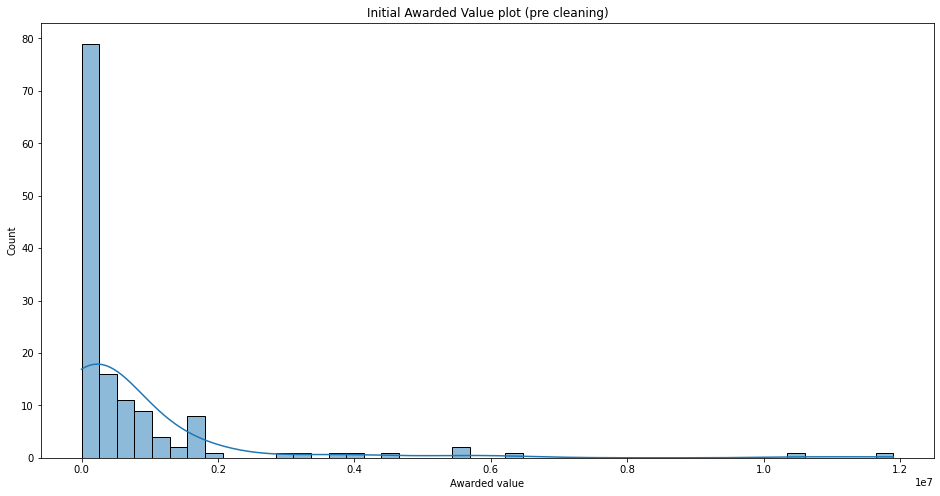

In [18]:
# Chapter 5 report reference - Report plot A
# create the figure object that plots with be contained within
# documentation : https://matplotlib.org/2.0.2/faq/usage_faq.html
fig = plt.figure(figsize = plot_size_rectangle)

# Plot both a kernal density estimation and histogram of the Awarded Value column 
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
g = sns.histplot(df['Awarded value'], kde=True)
p = plt.title('Initial Awarded Value plot (pre cleaning)')

There is a huge variance in the volume of contracts by value, which creates a difficult to read plot as this follows an exponential distribution. After £2 million awarded value, it is slightly more difficult to see the number of contracts. There are some contracts that are very valuable, but most contracts appear to be relatively low value. 

This data is perhaps not helped by the low sample size, so any insights needs to take this into account.

We dont want to impute any missing values to be the mean of the distribution as this would be misrepresentative on an exponential distribution, without first having tried to clean outliers and normalize the data.

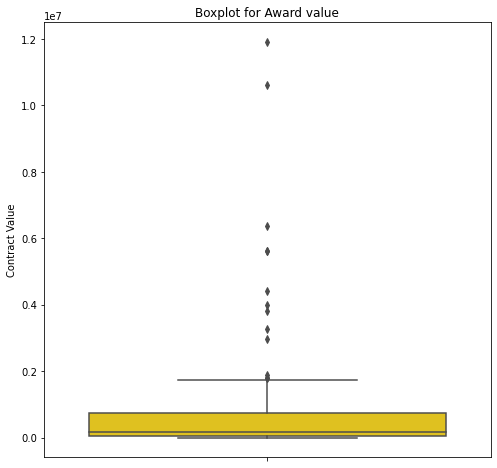

In [19]:
# we will look at outliers in rating using a box plot, even though this is an exponential distribution.
# the colour has been changed to try make the box easier to visualize
# matplotlib colour names are listed here: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.figure(figsize = plot_size_square)

sns.boxplot(y='Awarded value', data=df, orient='v', color='gold')
p = plt.title('Boxplot for Award value')
p = plt.ylabel('Contract Value')

This boxplot shows us "whiskers" at the edges of a "normal" distribution, values outside the "whiskers" are mathematically deemed to be outliers. Therefore according to this boxplot, approximately 11 contracts above £2 million in value, are outliers. With the data distribution being exponential, the bottom "whiskers" are so close to the interquartile range it makes low end outliers impossible to detect.

The interquartile range (the central coloured box), is incredibly narrow, giving us little insight.

We need to move onto other outlier detection methods for exponential datasets.

In [20]:
# Check the skewness value, this is covered in detail in the written report.
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html
print(df['Awarded value'].skew())

4.362426803454779


The skewness value is well above +1, which means we have a significant skew in our data!
This is borne out with the huge variance in the lowest contract being £7440.00 (excluding zero values) and the largest contract value being £11,900,000.

In [21]:
# print the column summary information
# format the numbers in non-scientific notation
# code from https://stackoverflow.com/a/47207283/13215135
df["Awarded value"].describe().apply(lambda x: format(x, 'f'))

count         140.000000
mean       771593.447286
std       1681728.694578
min             0.000000
25%         48950.862500
50%        165245.500000
75%        730236.250000
max      11900000.000000
Name: Awarded value, dtype: object

We will work out the 3 Sigma rule and the IQR extreme outlier test based on the suggestions of the following stackoverflow post:
https://stackoverflow.com/questions/2303510/recommended-anomaly-detection-technique-for-simple-one-dimensional-scenario

In [22]:
# find and print outliers using the three sigma outlier test on the exponential dataset
def print_three_sigma_outliers(number, mean, std):
    if(abs(number - mean) > (3 * std)):
        print(number)

# calculate the mean and standard deviation and store in a variable
mean = df["Awarded value"].mean()
std = df["Awarded value"].std()

three_sigma_outliers = df["Awarded value"].apply(print_three_sigma_outliers, args=(mean, 1561154.63))

5600000.0
11900000.0
5600000.0
10597000.0
6370000.0


In [23]:
# find outliers using the IQR extreme outlier test
# quantile method allows the user to define return values over their specified quantile
# quantile documentation = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
q25 = df["Awarded value"].quantile(q=0.25)
q75 = df["Awarded value"].quantile(q=0.75)

# custom method defined from the stack overflow post: 
# https://stackoverflow.com/questions/2303510/recommended-anomaly-detection-technique-for-simple-one-dimensional-scenario
def print_extreme_outliers(number, q25, q75):
    interquartile_range = q75 - q25
    if ((number < (q25 - 3.0 * interquartile_range)) | ((q75 + 3.0 * interquartile_range) < number)):
        print(number)

# now print IQR 'extreme' outliers
extreme_outliers = df["Awarded value"].apply(print_extreme_outliers, args=(q25, q75))

3804463.88
5600000.0
11900000.0
5600000.0
10597000.0
6370000.0
4000000.0
4400000.0
3260000.0
2980000.0


The IQR extreme outlier test gives us many more suggested outliers. We need to ensure both methods above are valid for this dataset. To remove all the IQR tests' suggested extreme outliers would reduce our dataset significantly because of its low sample size. As our dataset is exponential, this method above doesnt produce any outliers on the low value side of the distribution.

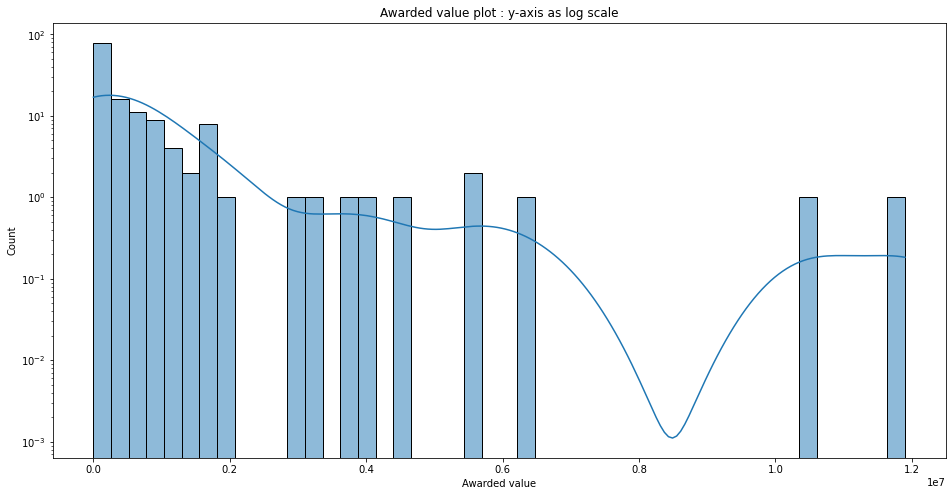

In [24]:
# Chapter 5 report reference - Report plot B
# Plot the awarded value data using a log scale on the y-axis
fig = plt.figure(figsize = plot_size_rectangle)
g = sns.histplot(df['Awarded value'], kde=True)
p = plt.title('Awarded value plot : y-axis as log scale')
ax = fig.add_subplot(111)

# set the y-axis to be logarithmic to see gaps more clearly
# example: https://stackoverflow.com/a/1183415/13215135
ax.set_yscale('log')

The plot above has a log scale, so every increase in the y axis represents a ten-fold increase in contract numbers. We can now see much more clearly the contract value gaps on the x-axis. This suggests anything with a value of more than £6 million could be a potential outlier?

In [25]:
# normalize the exponential data with a boxcox transformation
# refer to the report for more details
# handling zero values taken from this stackoverflow post https://stackoverflow.com/a/50181610/13215135
positive_data = df[df['Awarded value'] > 0]

bcdata, lam = stats.boxcox(positive_data['Awarded value'])

# check boxcox lambda is > 0
# this is required to proceed with Box Cox transformation (refer stack overflow post above)
lam

0.012316637669014533

In [26]:
# generate a new normalized dataframe 
# documentation: https://numpy.org/doc/stable/reference/generated/numpy.empty_like.html
new_normalised_df = np.empty_like(df['Awarded value'])

# infill positive data from the boxcox transform first 
new_normalised_df[df['Awarded value'] > 0] = bcdata

# replace any zero value with -1 / lambda
# this is discussed in the 'conclusions and further work' section of the report
new_normalised_df[df['Awarded value'] == 0] = -1/lam

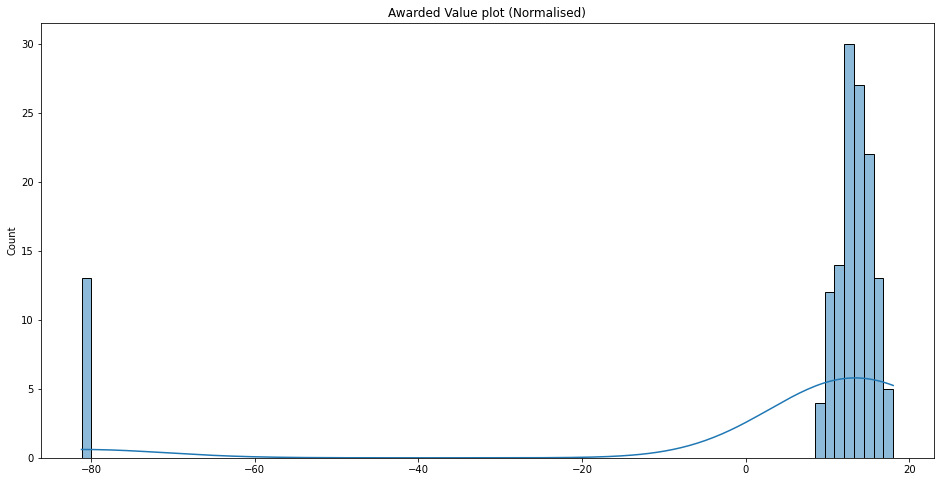

In [27]:
# now plot the newly normalized distribution
fig = plt.figure(figsize = plot_size_rectangle)
g = sns.histplot(new_normalised_df, kde=True)
p = plt.title('Awarded Value plot (Normalised)')

Now that we have our normalised distribution plotted, we can clearly see the values that are outliers. Next we will take values less than 1 and make them the median of the distribution. The wisdom of this step is discussed in the written report.

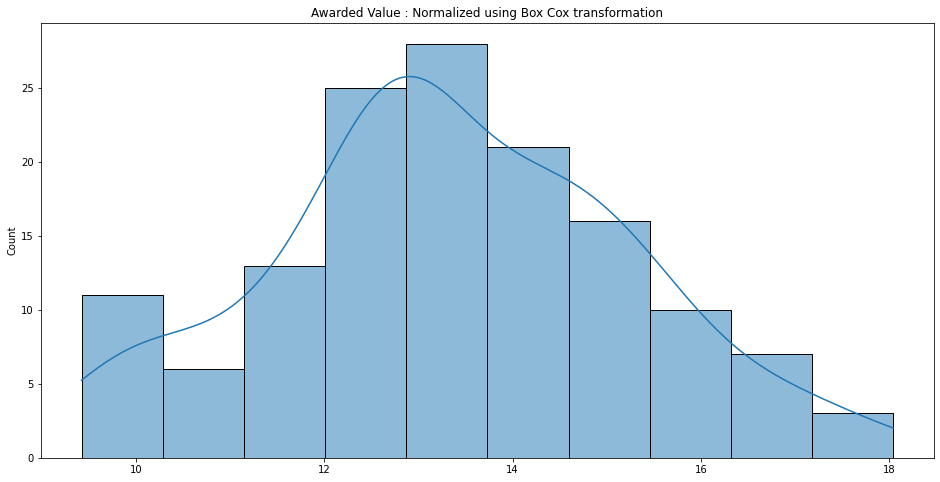

In [28]:
# calculate the normalised median
normalised_median = np.median(new_normalised_df)

# replace any value less than 1 with the normalised median
new_normalised_df = np.where(new_normalised_df < 1, normalised_median, new_normalised_df)

#now replot the normalized, cleaned up awarded values
# Chapter 4 report reference - Report 4 plot A
# now plot the newly normalized distribution
fig = plt.figure(figsize = plot_size_rectangle)
g = sns.histplot(new_normalised_df, kde=True)
p = plt.title('Awarded Value : Normalized using Box Cox transformation')

We can see that there is a gap between zero and the left side of the normalised distribution. It is highly probable that there is a financial reporting limit for public procurement, below which no data is released.

Aside from this, the first bar is relatively high then the next two bars are lower than we would expect in a gaussian distribution. This chart is perhaps distorted due to the decision to make all zero values the median of the normalized distribution, a better way to deal with this has been discussed in the 'conclusions and further work' section of the report.

Now, we will calculate the z-score. This is covered in detail in the written report.

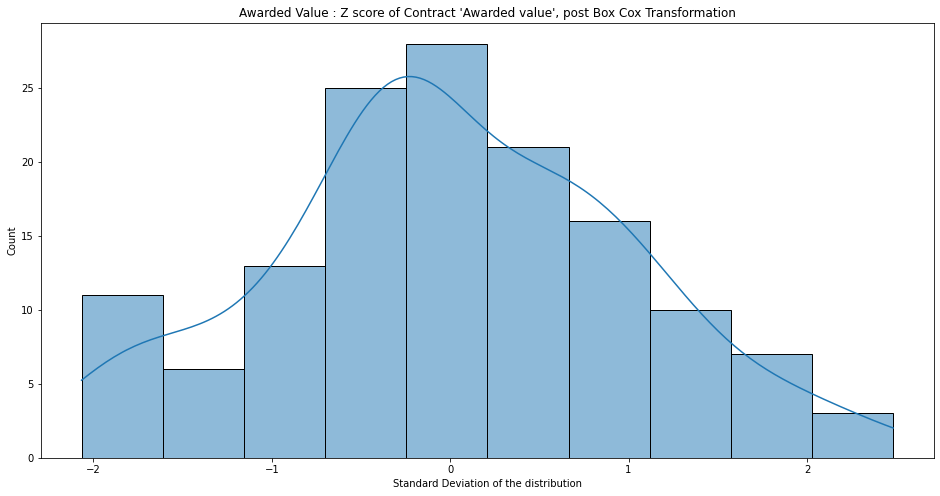

In [29]:
# Chapter 4 report reference - Report 4 plot B
# calculate the z score of the normal distribution
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
z_score = stats.zscore(new_normalised_df)

# now plot the z-score as a density plot
fig = plt.figure(figsize = plot_size_rectangle)
g = sns.histplot(z_score, kde=True).set(xlabel='Standard Deviation of the distribution')
p = plt.title('Awarded Value : Z score of Contract \'Awarded value\', post Box Cox Transformation')

Note the x-axis now represents standard deviations from the mean.

In [30]:
# get the size of the numpy z_score array pre trimming outliers
z_score.shape

(140,)

In [31]:
# we want to see the largest and smallest values from the z_score array
# therefore sort the numpy array in order so we can see highest and lowest values
# documentation: https://numpy.org/doc/stable/reference/generated/numpy.sort.html
np.sort(z_score)

array([-2.0663841 , -2.03552322, -2.02361229, -1.96276919, -1.89209244,
       -1.83021821, -1.77103643, -1.74729728, -1.74729728, -1.72922083,
       -1.6974804 , -1.54717246, -1.51355275, -1.48026605, -1.40049434,
       -1.40049434, -1.24591152, -1.1484897 , -1.11058734, -1.09551357,
       -1.08837384, -0.96422163, -0.9368001 , -0.93075307, -0.93075307,
       -0.89232735, -0.88431547, -0.77249667, -0.77226391, -0.77226391,
       -0.64646945, -0.60270681, -0.60270681, -0.5586098 , -0.55589633,
       -0.55589633, -0.54371536, -0.52976057, -0.52976057, -0.51092294,
       -0.47546664, -0.45247126, -0.43831734, -0.3669559 , -0.3669559 ,
       -0.36113149, -0.35895963, -0.35718875, -0.35684532, -0.35110309,
       -0.33678796, -0.33064916, -0.30728045, -0.2722896 , -0.26369176,
       -0.2114704 , -0.2114704 , -0.20450124, -0.20450124, -0.20450124,
       -0.20450124, -0.20450124, -0.20450124, -0.20450124, -0.20450124,
       -0.20450124, -0.20450124, -0.20450124, -0.20450124, -0.20

In [32]:
# now trim the z_score array based on values that are larger and smaller than 2 std deviations from mean
# documentation: https://numpy.org/doc/stable/reference/generated/numpy.delete.html
trimmed_data = np.delete(z_score, np.where((z_score < -2.0) | (z_score > 2.0)))

# see how many values we are left with now we have trimmed outliers
trimmed_data.shape

(134,)

We see that there are three values above 2 standard deviations and three values below 2 standard deviations that are suggested outliers. 

We will see which values these are in the original dataframe.

In [33]:
# now sort and print the list of values from the original data, so we can id the top and bottom three rows
awarded_value_series = df["Awarded value"]
awarded_value_series.sort_values()

122           0.0
66            0.0
121           0.0
123           0.0
124           0.0
          ...    
24      5600000.0
21      5600000.0
63      6370000.0
55     10597000.0
22     11900000.0
Name: Awarded value, Length: 140, dtype: float64

The outlier detection process above is discussed in more detail in the written report.

## Further data cleaning by column

Now the final dataset cleaning will be completed, starting with cleaning and tidying the Date column

In [34]:
# Report 4 Reference C
# convert the date column to be a datetime object
# pandas infers the date type for this example for each row - prevents errors when the data is consistent
# worked example :  https://stackoverflow.com/a/55826327/13215135
df['Date of Award'] = pd.to_datetime(df['Date of Award'])

# print dataframe information to check the conversion worked!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                140 non-null    object        
 1   Awarded value        140 non-null    float64       
 2   Date of Award        140 non-null    datetime64[ns]
 3   Company name         140 non-null    object        
 4   Street               139 non-null    object        
 5   City                 139 non-null    object        
 6   Postal code          139 non-null    object        
 7   Contract awarded by  138 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 9.8+ KB


Next, since our dataset covers one full tax year, we want to visualize the months that projects were awarded to see if there are any issues with that data.

<AxesSubplot:xlabel='Date of Award'>

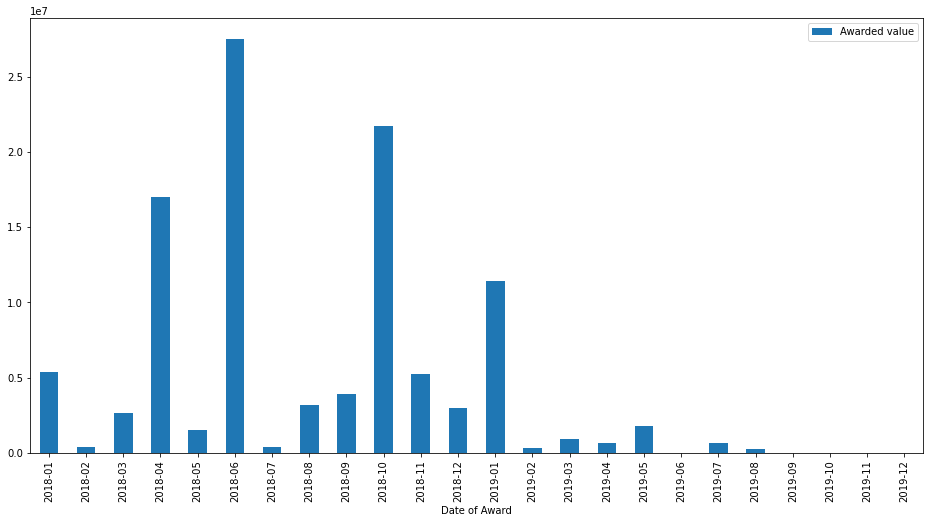

In [35]:
# Chapter 5 report reference - Report plot C
# plot months that contracts are awarded vs contract value as this may help us see issues with the dates.

# matplotlib (and therefore seaborn) doesnt handle temporal data well, pandas plot() function has been used instead
# code found aftr a google search at https://stackoverflow.com/a/63028583/13215135
# documentation to plot from pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df1 = df.groupby(df['Date of Award'].dt.to_period('M')).sum()
df1 = df1.resample('M').asfreq().fillna(0)
df1.plot(kind='bar', figsize = plot_size_rectangle)

Next we will clean the 'City' column: this is the City of the company who won the contract.

In [36]:
#count cities and towns as unique values
df['City'].value_counts()

BELFAST          24
Belfast          15
NEWRY            12
CRAIGAVON         7
Newry             5
WIthheld          4
DOWNPATRICK       4
DUNGANNON         4
COOKSTOWN         4
STRABANE          3
WITHHELD          3
CASTLEDERG        3
ARMAGH            3
Magherafelt       3
OMAGH             3
Various           2
BANGOR            2
 Craigavon        2
Bangor            2
Lisburn           2
BALLYMONEY        2
NEWTOWNABBEY      2
POMEROY           2
Withheld          1
Newtownabbey      1
 BELFAST          1
SHROPSHIRE        1
SAINTFIELD        1
Netwnabbey        1
Greysteel         1
MAGHERA           1
Dungannon         1
Antrim            1
London            1
Penarth           1
Downpatrick       1
Belfast           1
Castlewellan      1
Epsom             1
Omagh             1
NORTHAMPTON       1
Castlederg        1
Dromore           1
COLERAINE         1
CARRICKFERGUS     1
ANTRIM            1
Dungiven          1
Strabane          1
MALLUSK           1
Name: City, dtype: i

A lot of these names dont differentiate between upper and lower case, creating duplicates, we can tidy that simply by turning every city name to the same case and capitalizing the words! We also need to strip out white space from left and right side of names before comparing value counts.

In [37]:
# edit the dataframe column to suit the parameters listed above
# documentation for python capitalize() method : https://www.w3schools.com/python/ref_string_capitalize.asp 
df['City'] = df['City'].str.strip().str.capitalize()

# lastly, we only want to print the top 10 Towns and Cities.
# nlargest() documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
df['City'].value_counts().nlargest(10)

Belfast        41
Newry          17
Craigavon       9
Withheld        8
Dungannon       5
Downpatrick     5
Strabane        4
Bangor          4
Cookstown       4
Omagh           4
Name: City, dtype: int64

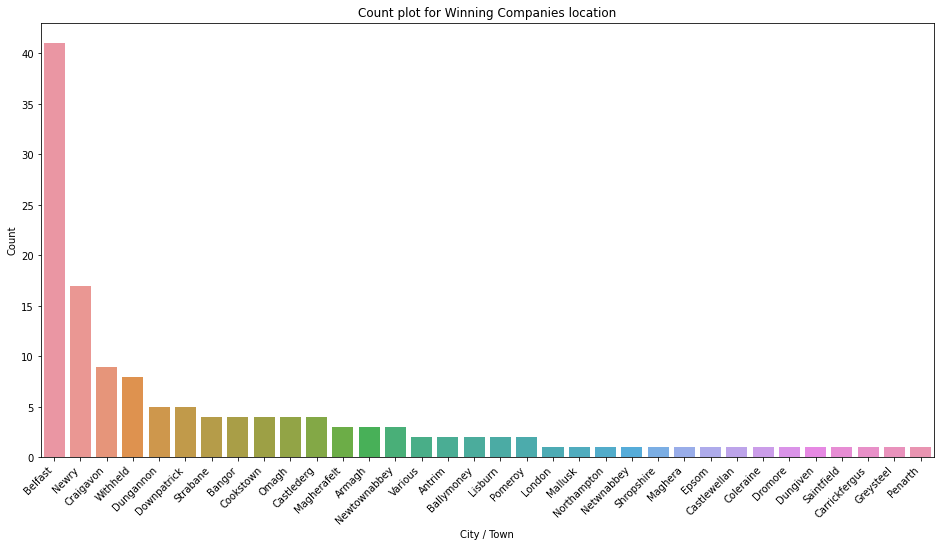

In [38]:
# We will produce a plot showing the Towns and Cities with highest representation

plt.figure(figsize = plot_size_rectangle)
g = sns.countplot(x='City', data=df, order = df['City'].value_counts().index) 
p = plt.title('Count plot for Winning Companies location')
p = plt.xlabel('City / Town')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

We have another exponential distribution for the location of companies who win projects. 

Outside of Belfast, we can see that Addresses from the West and South of Northern Ireland are most highly represented. If we wanted a broader view of this we would need to gather many such datasets to examine trends and other variables. How do companies from the South and West dominate in winning contracts?

Next we will clean the awarding body column.

In [39]:
# print all awarding bodies to see how tidy the data is
# value_counts() documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
df['Contract awarded by'].value_counts()

Belfast Health  and  Social Care Trust          41
South Eastern Health  and  Social Care Trust    19
Western Health  and  Social Care Trust          11
DfC                                             10
DoF                                              9
Southern Health  and  Social Care Trust          6
Northern Health  and  Social Care trust          5
DfI Rivers Agency                                5
Northern Ireland Fire  and  Rescue Service       4
Northern Health  and  Social Care Trust          4
Northern Ireland Policing Board                  4
NIFRS                                            3
DE                                               2
The Executive Office                             2
DOJ                                              2
DfI                                              2
DAERA                                            1
Department of Justice                            1
InvestNI                                         1
South Eastern Health  and  Soci

We can see quite a few abbreviations, and this appears to be creating duplicates - the names will be expanded for clarity for anyone viewing the data. 

In [40]:
# function to change the name of a public body based on its provided abbreviation
# All abbreviations were googled to get the full department name
def rename_public_body(name):
    if (name == 'DfE'):
        return 'Department for Economy'
    elif (name == 'DE'):
        return 'Department of Education'
    elif (name == 'DfC'):
        return 'Department for Communities'
    elif (name == 'DoF'):
        return 'Department of Finance'
    elif (name == 'NIFRS'):
        return 'Northern Ireland Fire and Rescue Service'
    elif (name == 'DOJ' or name == 'DOJ'):
        return 'Department of Justice'
    elif (name == 'DFI' or name == 'DfI'):
        return 'Department for Infrastructure'
    elif (name == 'AFBI' or name == 'DAERA'):
        return 'Department of Agriculture, Environment and Rural Affairs'
    elif (name == 'BHSCT'):
        return 'Belfast Health and Social Care Trust'
    elif (name == 'NWRC'):
        return ' North West Regional College'
    elif (name == 'PSNI'):
        return 'Police Service of Northern Ireland'
    else:
        return name
    
# now change each value in the column based on the function above
df['Contract awarded by'] = df['Contract awarded by'].apply(rename_public_body)

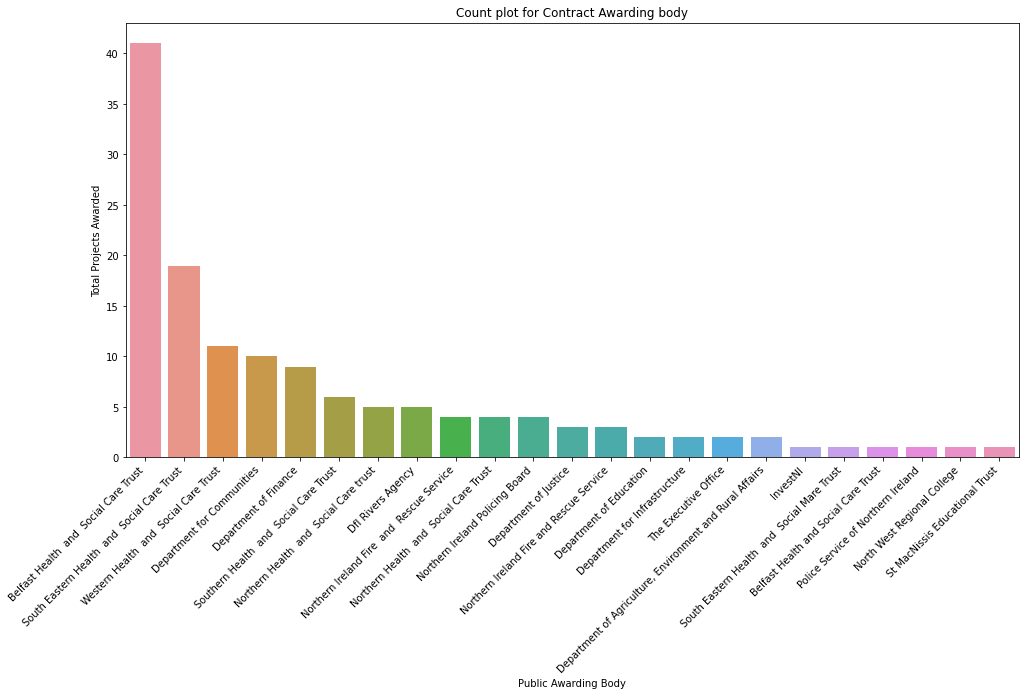

In [41]:
# Now plot the Contract Awarding Body column to see who is issing the most new work

plt.figure(figsize = plot_size_rectangle)
g = sns.countplot(x='Contract awarded by', data=df, order = df['Contract awarded by'].value_counts().index)
p = plt.title('Count plot for Contract Awarding body')
p = plt.xlabel('Public Awarding Body')
p = plt.ylabel('Total Projects Awarded')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

We can see that six of the top ten bodies awarding construction contracts within this dataset are Health and Social Care services. We could perhaps uncover data on the number of properties these departments own to check the contract volume vs who owns the most property for further insights.

Next we want to take a look at the companies who win awarded contracts.

In [42]:
# print out unique company names, in sorted order, to see poor quality data
np.sort(df['Company name'].unique())

array([' Gregory Architects Ltd', 'A and M Haughian Ltd',
       'AC Automation U.K. Ltd',
       'AECOM INFRASTRUCTURE  and  ENVIRONMENT UK LTD ', 'AECOM Ltd',
       'ALASTAIR COEY ARCHITECTS LTD', 'ATKINS LTD',
       'BI Electrical Services NI Ltd', 'Bell Contracts',
       'CGC Laboratory Ltd', 'CHC Group', 'Cleary Contracting Ltd',
       'Combined Facilities Management', 'D Hooke Contracts',
       'D J Dickson', 'DEMAC Construction Ltd', 'Doran Consulting Ltd',
       'Down Developments Ltd', 'Ernest Watt  and  Sons',
       'Eugene Duffy Construction Ltd', 'FM Construction Services Ltd',
       'FP McCann', 'Faithful  and  Gould', 'Graham Asset Management Ltd',
       'Graham Facilities Management', 'H  and  J Martin Ltd',
       'H and J Martin Ltd', 'HD9 Ltd', 'HUGH J. OBOYLE LTD',
       'Hamilton Architects LLP', 'Harry Rolston Architect Ltd',
       'Hawthorn Heights Ltd', 'Healthcare Facilities Ltd',
       'Irwin M and E Ltd', 'J  and  M Begley Building Contractors Ltd'

We have the name of 'Withheld', 'WITHHELD' and 'WIthheld', these should be tidied into one name. These names are redacted for the safety of people working for the Department of Justice in Northern Ireland.

Companies with similar names cannot always be taken to be the same company, some businesses register subsidiaries for tax reasons or to compartmentalize risk, or even to segregate high risk projects.

We also have the name 'Various', but we cannot re-attribute this or 'withheld' contracts to any other company without polluting the dataset. We have no way of knowing the contract values or whether the winning company is even currently represented, so 'withheld' and 'various' company names have to stay as is.

In [43]:
# function to rename all variants of 'withheld' name for tidiness
def rename_withheld_variants(name):
    if (name.lower() == 'withheld'):
        return 'Withheld'
    else:
        # return the original name and strip whitespace from either side
        return name.strip()

# now apply the above function to all company names
df['Company name'] = df['Company name'].apply(str).apply(rename_withheld_variants)

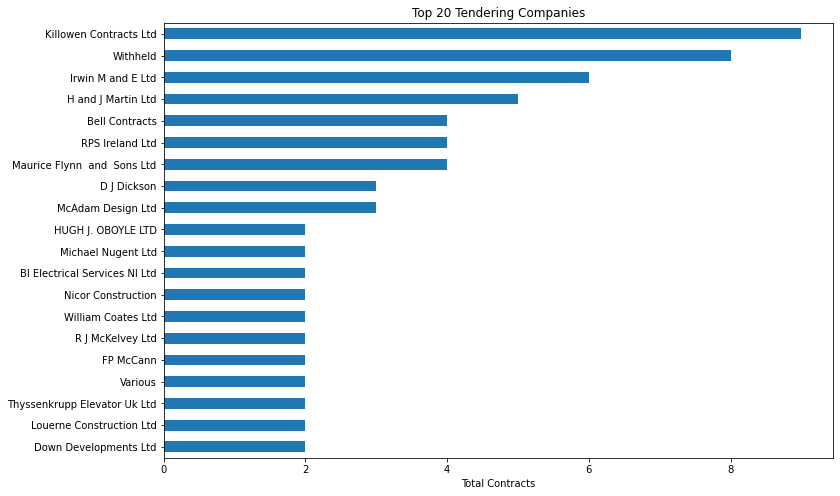

In [44]:
# we will produce a histogram of the top 20 companies who have won projects
plt.figure(figsize = plot_size_medium)
g = df["Company name"].value_counts().nlargest(20).plot(kind='barh')
p = plt.title('Top 20 Tendering Companies')
plt.gca().invert_yaxis() #invert the plot to show largest company first
p = plt.xlabel('Total Contracts')

We cant clean much more on the company names for now.
We will print a selection of unique names for project titles to see what could be done with the title column.

In [45]:
df['Title'].unique()

array(['SE1239829M Replacement of Air Handling Unit at Lagan Valley Hospital',
       'SE1240005M Refurbishment of plant room at River House Lagan Valley Hospital',
       'Maydown PSNI Station Conversion to Gas  Various Buildings Site Wide',
       'PSNI Estate  Electronic Access Control Systems',
       'Peace Walls Maintenance Contract',
       'Southern Trust  Extension to SHSCT MTC',
       'Northern Trust  Provision of Minor Electrical Works  Northern Sector',
       'Refurb of 1st Floor South BVH',
       'Belfast Trust  Refurb of 1st Floor South BVH',
       'Assessments of Control Structures Reissue',
       'Ebrington development Framework Transport Assessment Update reissue',
       'SE1350440E Replacement of staff attack systems in mental health facilities Trustwide',
       'Drumahoe Eglinton and Londonderry Feasibility Studies ReIssue',
       'DE 1378748  Appointment of Integrated Consultant Team ICT for St Killians College Carnlough',
       'PSNI  Seapark PSNI Station 

We can see that some of the names have the awarding body (this is already in another column).
Some have a contract number specific to that department and some have locations.
Some titles have the nature of the work being carried out (refurbishment, framework, refresh, upgrade, demolition), and many do not.

There is little consistency in the title names. We can assume by looking at these that this is aggregated data from multiple sources and it is hard to see how these could be grouped. We will keep this column though as its useful for manual processing.

In [46]:
# print the bottom 5 rows of data to see how the data looks now for the whole dataframe
df.tail()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by
135,Provision of Aids and Adaptations Minor Work...,80000.0,2019-03-21,McGuigan Construction Ltd,38 Garvagh Road,Dungannon,BT70 3LS,Northern Health and Social Care Trust
136,Upgrade of CCTV at Royal Courts of Justice Bel...,250000.0,2019-03-22,Withheld,WITHHELD,Withheld,WITHHELD,Department of Justice
137,Crumlin Road Gaol CCTV System Refresh,37088.0,2019-03-22,VIS Security Solutions Ltd,1618 Lower Windsor Avenue,Belfast,BT9 7DW,Department for Infrastructure
138,Electrical Training IET Regulations BS 767120...,11098.0,2019-03-22,Training Solutions NI Ltd,New Horizons4A Steeple Road,Antrim,BT41 1AF,Department of Finance
139,Invest NI London Office Fitout Framework Calloff,477556.8,2019-03-25,Overbury PLC,77 Newman Street,London,W1T 3EW,InvestNI


For consistency, we will tidy other columns that have 'withheld' as data, as we have already written a function to do this.

In [47]:
df['Street'] = df['Street'].apply(str).apply(rename_withheld_variants)
df['Postal code'] = df['Postal code'].apply(str).apply(rename_withheld_variants)
df['Company name'] = df['Company name'].apply(str).apply(rename_withheld_variants)
df.tail()

,Title,Awarded value,Date of Award,Company name,Street,City,Postal code,Contract awarded by
135,Provision of Aids and Adaptations Minor Work...,80000.0,2019-03-21,McGuigan Construction Ltd,38 Garvagh Road,Dungannon,BT70 3LS,Northern Health and Social Care Trust
136,Upgrade of CCTV at Royal Courts of Justice Bel...,250000.0,2019-03-22,Withheld,Withheld,Withheld,Withheld,Department of Justice
137,Crumlin Road Gaol CCTV System Refresh,37088.0,2019-03-22,VIS Security Solutions Ltd,1618 Lower Windsor Avenue,Belfast,BT9 7DW,Department for Infrastructure
138,Electrical Training IET Regulations BS 767120...,11098.0,2019-03-22,Training Solutions NI Ltd,New Horizons4A Steeple Road,Antrim,BT41 1AF,Department of Finance
139,Invest NI London Office Fitout Framework Calloff,477556.8,2019-03-25,Overbury PLC,77 Newman Street,London,W1T 3EW,InvestNI


# Export as a new CSV file

In [48]:
# Export the cleaned dataset as a CSV to the same directory as this notebook
# refer the documentation side panel for further "to_" functions
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv("cleaned_construction_contracts_2018_19.csv")

# Pivot table

A pivot table has been demonstrated in the Chapter 5 notebook.

# Chapter 5 probability plots

While completing the work for chapter 5, probability plots were discovered, so these plots were added as further means to detect outliers for this dataset.

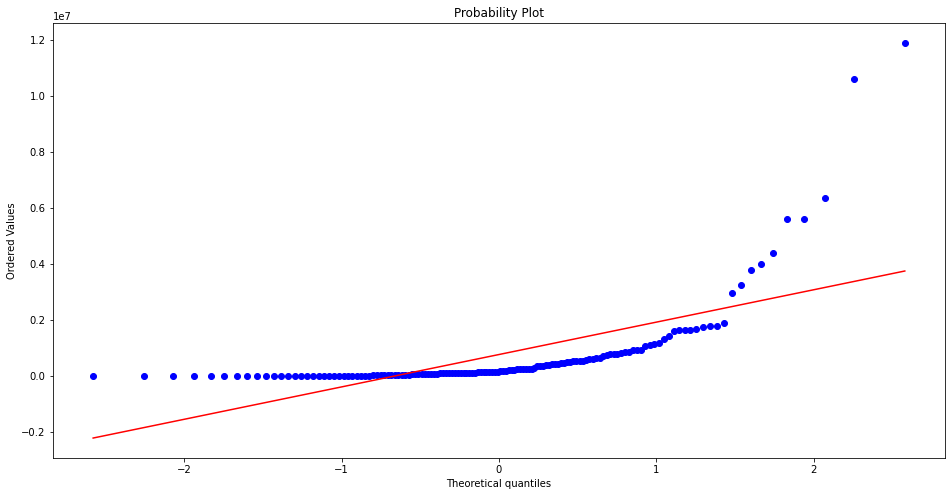

In [49]:
# perform a probability plot of the non-normalised 'awarded value' data to detect outliers
# datapoints that are far away from the "normal" distribution may indicate outliers.
fig = plt.figure(figsize = plot_size_rectangle)
res = stats.probplot(df['Awarded value'], plot=plt)

The plot above shows us with its shape that this is a skewed distribution, which we already know. The red line is trying to show a normal distribution, which is irrelevant for this dataset as we know its exponential. 

We will complete the same plot on the normalized data for comparison.

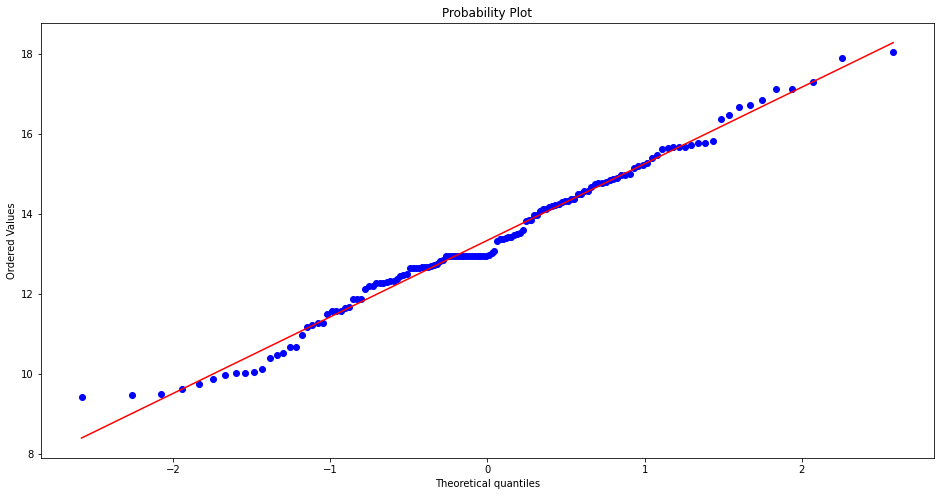

In [50]:
# perform a probability plot of the normalized 'awarded value' data
fig = plt.figure(figsize = plot_size_rectangle)
res = stats.probplot(new_normalised_df, plot=plt)

This data closely follows a normal distribution, which isnt much of a surprise since Box-Cox power transformation was completed on it for this purpose. This plot may suggest that some of values at bottom left and some of the higher values (top right) are outliers.

# Further Visualisations for Chapter 5 analysis

Further effort was made to plot the date of contracts being awarded with the total amount of contracts being awarded. 

This stopped when the date representation bug in the data could not be resolved.
Code cells are retained to help see what work has been done so far.

In [51]:
# debugging df.plot() - sort the dates to see what dates exist in the dataframe
np.sort(df['Date of Award'].unique())

array(['2018-01-06T00:00:00.000000000', '2018-01-11T00:00:00.000000000',
       '2018-02-10T00:00:00.000000000', '2018-03-09T00:00:00.000000000',
       '2018-03-10T00:00:00.000000000', '2018-03-12T00:00:00.000000000',
       '2018-04-05T00:00:00.000000000', '2018-04-09T00:00:00.000000000',
       '2018-04-10T00:00:00.000000000', '2018-04-17T00:00:00.000000000',
       '2018-04-24T00:00:00.000000000', '2018-05-04T00:00:00.000000000',
       '2018-05-07T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-05-15T00:00:00.000000000', '2018-05-29T00:00:00.000000000',
       '2018-06-06T00:00:00.000000000', '2018-06-07T00:00:00.000000000',
       '2018-06-08T00:00:00.000000000', '2018-06-12T00:00:00.000000000',
       '2018-06-13T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-06-22T00:00:00.000000000', '2018-06-29T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-30

In [52]:
# debugging df.plot() 
# bug to fix in future work : somehow the date is being changed to cover two full calendar years, not one full tax year
# visualize the data produced into a new dataframe prior to plotting
# pandas data offset strings documentation: https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases
date_value_df = df.groupby(df['Date of Award'].dt.to_period('M')).sum()
date_value_df

,Awarded value
Date of Award,
2018-01,5391581.00
2018-02,400164.00
2018-03,2666398.00
2018-04,17027178.15
2018-05,1525522.00
2018-06,27527401.23
2018-07,421160.85
2018-08,3166021.80
2018-09,3923600.00


In [53]:
# debugging df.plot()
# trial debugging - check the new dataframe hasnt distorted the total awarded sum
date_value_df['Awarded value'].sum()

108023082.62

In [54]:
# debugging df.plot()
df['Awarded value'].sum()

108023082.62

<AxesSubplot:xlabel='Date of Award'>

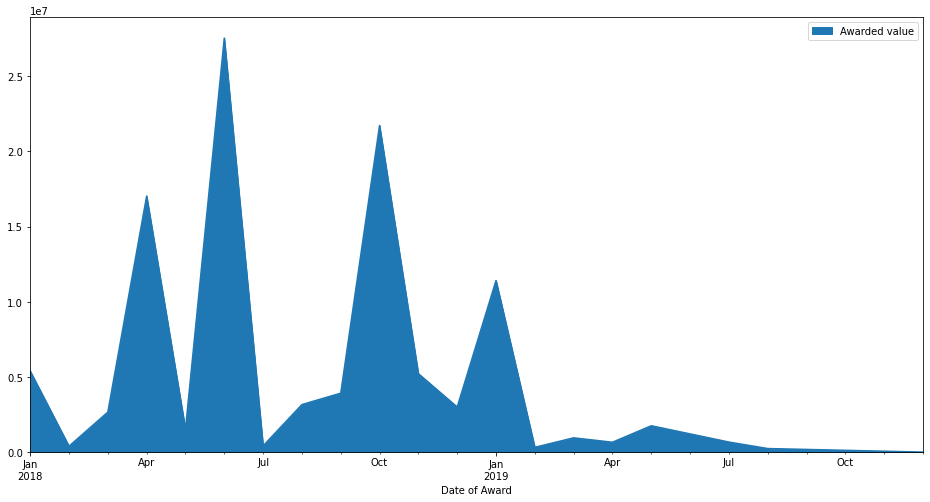

In [55]:
# debugging df.plot()
# plot the 'date_value_df' dataframe values as an area plot
date_value_df.plot(figsize = plot_size_rectangle, kind='area')